In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("climate-ds.csv")  # Ensure correct file path

# Selecting relevant features and target
features = ["avg_temp", "pesticides_tonnes", "average_rain_fall_mm_per_year"]
target = "hg/ha_yield"

X = df[features]
y = df[target]

# Handling missing values (if any)
X = X.copy()  # Create a copy to avoid modifying the original DataFrame
X.fillna(X.mean(), inplace=True)

y.fillna(y.mean(), inplace=True)

# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with StandardScaler and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimized Mean Absolute Error: {mae}")

# Finding the best crop based on predicted yield
best_crop_idx = np.argmax(y_pred)
best_crop = df.iloc[best_crop_idx]["Item"]  # Assuming 'Item' column has crop names
best_yield = y_pred[best_crop_idx]

print(f"Best crop based on prediction: {best_crop} with yield {best_yield}")


Optimized Mean Absolute Error: 63062.125693363436
Best crop based on prediction: Potatoes with yield 287877.32752686343


In [4]:
print(df.columns)


Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield'],
      dtype='object')


In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor()

# Perform Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
best_model = rf_random.best_estimator_  # Best model found
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimized Mean Absolute Error: {mae}")


C:\Users\k vaishnavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Optimized Mean Absolute Error: 63124.45431027207


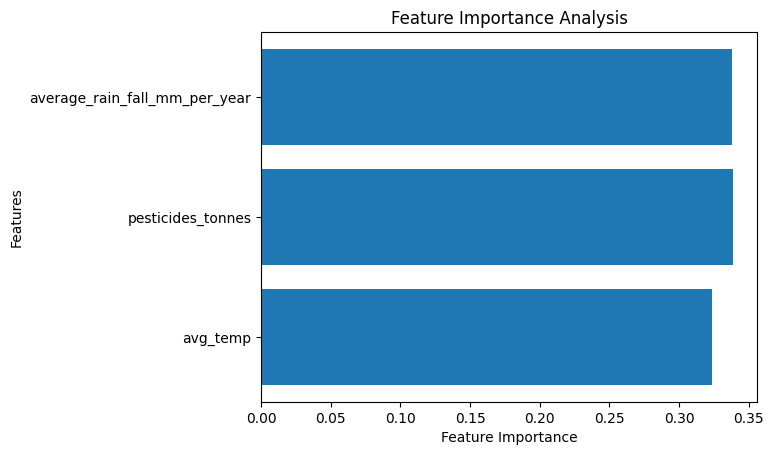

In [3]:
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor()

# Perform Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
best_model = rf_random.best_estimator_  # Best model found
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimized Mean Absolute Error: {mae}")


Optimized Mean Absolute Error: 63063.23516682014


In [6]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")


XGBoost MAE: 62632.84609632582


In [7]:
from sklearn.feature_selection import RFE

rfe = RFE(best_model, n_features_to_select=5)  # Keep top 5 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

best_model.fit(X_train_rfe, y_train)
y_pred_rfe = best_model.predict(X_test_rfe)

mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
print(f"MAE after feature selection: {mae_rfe}")


C:\Users\k vaishnavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=5 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(


MAE after feature selection: 63095.99500289394


In [10]:
from skopt import BayesSearchCV

bayes_search = BayesSearchCV(
    best_model,
    {
        'n_estimators': (50, 300),
        'max_depth': (5, 30),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4)
    },
    n_iter=20,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42
)

bayes_search.fit(X_train, y_train)
best_bayes_model = bayes_search.best_estimator_
y_pred_bayes = best_bayes_model.predict(X_test)

mae_bayes = mean_absolute_error(y_test, y_pred_bayes)
print(f"MAE after Bayesian Optimization: {mae_bayes}")


C:\Users\k vaishnavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


MAE after Bayesian Optimization: 62575.55758290186


In [9]:
!pip install scikit-optimize



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\k vaishnavi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
